In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score,roc_curve, auc

#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#K-Nearest Neighbors
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Decision Trees
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Support Vector Machines(SVM)
from sklearn.svm import SVC

# CatBoost
import shap
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

# Extreme Gradient Boosting (XGBoost)
import seaborn as sns
from xgboost import XGBClassifier

# Ensemble Methods
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [12]:
# Loading the heart dataset
heart = pd.read_csv('heart.csv')

# **EXPLORATORY DATA ANALYSIS**

In [13]:
# Display heart dataset columns in the dataset
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [14]:
# Display summary statistics for numerical features
print(heart.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [15]:
# Check for missing values
print(heart.isnull().sum())

# Handle missing values (if any)
# For example, you can impute missing values with the mean or median
heart.fillna(heart.mean(), inplace=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [16]:
type(heart)

pandas.core.frame.DataFrame

In [17]:
heart.shape

(1025, 14)

In [18]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [19]:
heart['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

C:\Users\DILEEP KUMAR REDDY\anaconda3\New folder\PYTHON ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


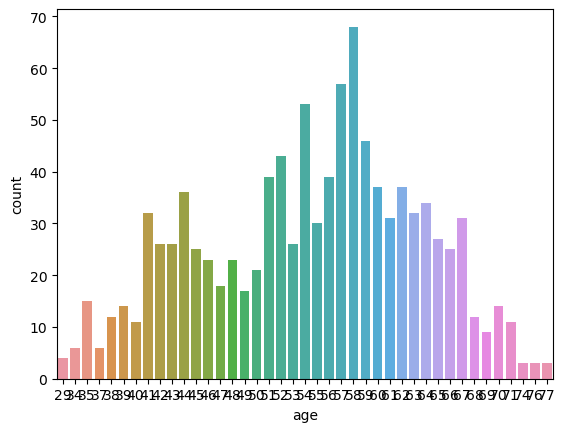

In [24]:
y = heart['age']
sns.countplot(y)
age_temp = heart.age.value_counts()


C:\Users\DILEEP KUMAR REDDY\anaconda3\New folder\PYTHON ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='age'>

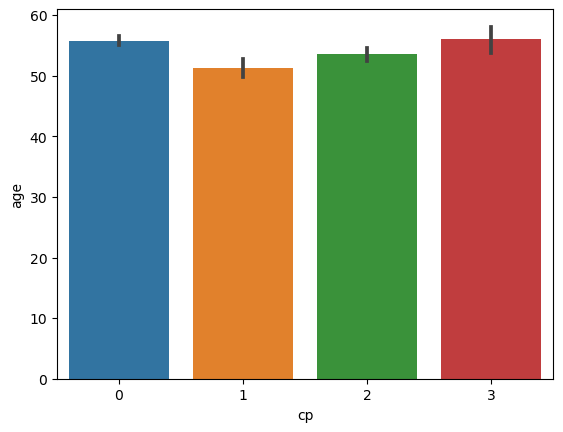

In [25]:
sns.barplot(heart['cp'],y)

In [26]:
heart["sex"].unique()

array([1, 0], dtype=int64)

In [27]:
# You can perform feature scaling, encoding categorical variables, or create new features here
# For example, you can encode categorical variables using one-hot encoding:
heart = pd.get_dummies(heart, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])

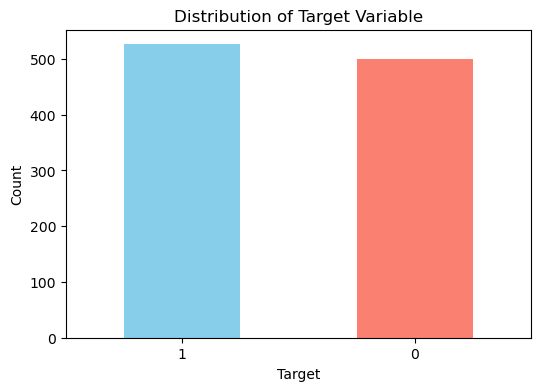

In [28]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
heart['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


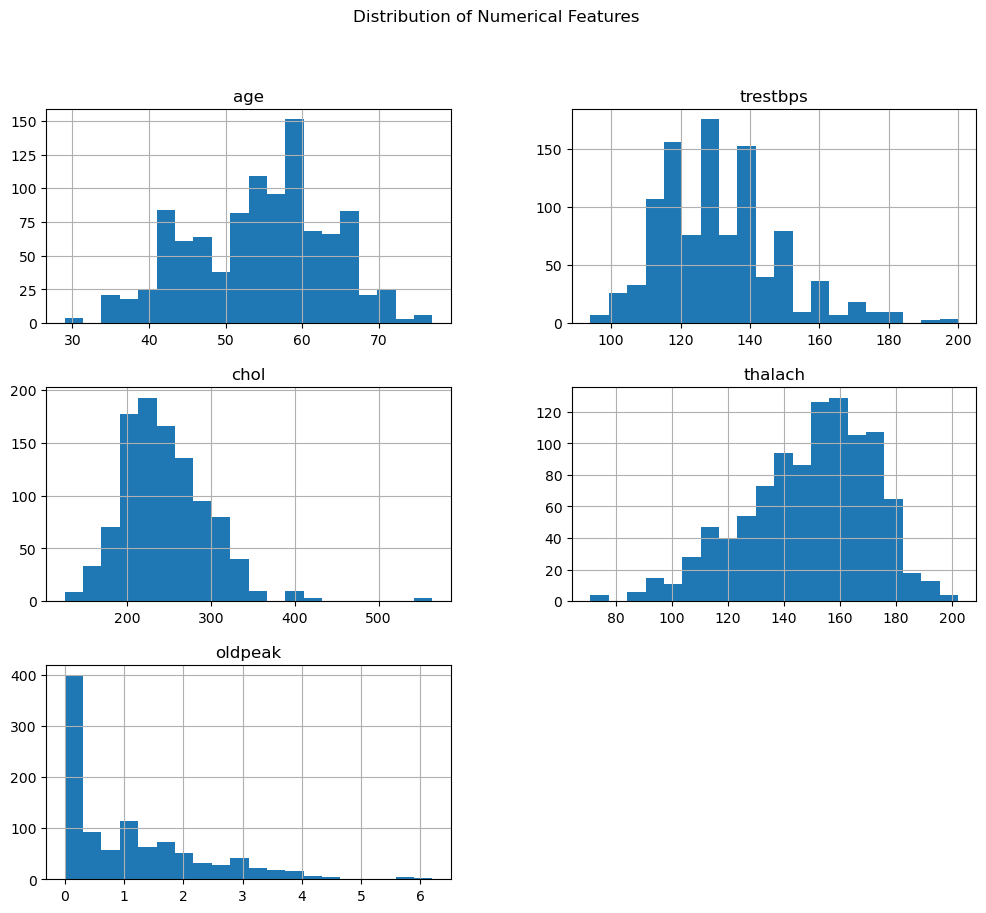

In [29]:
# Visualize the distribution of numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart[numerical_features].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

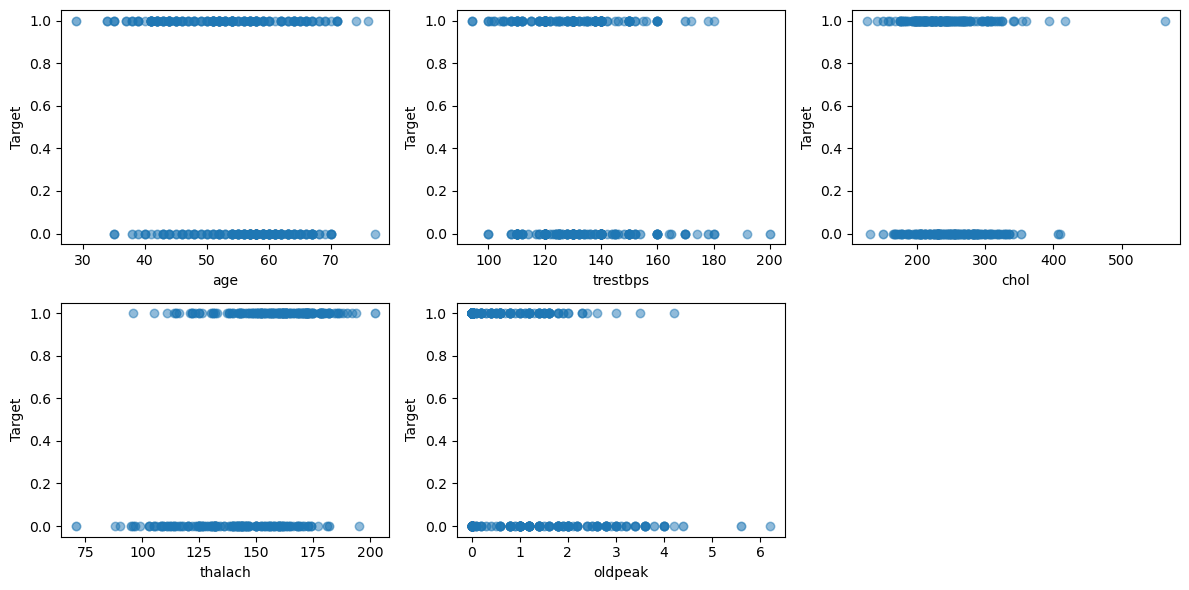

In [30]:
# Visualize the relationship between numerical features and the target variable
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(heart[feature], heart['target'], alpha=0.2)
    plt.xlabel(feature)
    plt.ylabel('Target')
plt.tight_layout()
plt.show()

# **MACHINE LEARNING**

 ## **Linear Regression**

In [31]:
# Assuming 'chol' is the target variable you want to predict
target_variable = 'chol'

In [32]:
# Split the data into features (X) and target variable (y)
X = heart.drop(target_variable, axis=1)  # Assuming 'chol' is not included in the features
y = heart[target_variable]

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Initialize the linear regression model
model = LinearRegression()

In [35]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3154.079818203164


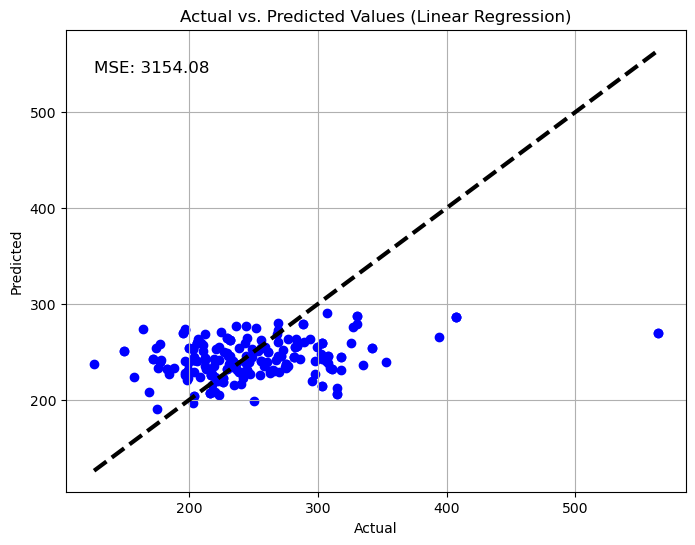

In [38]:
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.text(y_test.min(), y_test.max()-10, f'MSE: {mse:.2f}', fontsize=12, verticalalignment='top')
plt.grid(True)
plt.show()

## **Logistic Regression**

*Logistic regression is a supervised machine learning algorithm used for classification tasks. Its primary goal is to predict the probability that an instance belongs to a given class or not.* 

In [39]:
# Assuming 'target' is the binary target variable indicating presence or absence of cardiovascular disease
X = heart.drop('target', axis=1)
y = heart['target']

In [40]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Initialize the logistic regression model
model = LogisticRegression()

In [42]:
# Train the model
model.fit(X_train_scaled, y_train)

C:\Users\DILEEP KUMAR REDDY\anaconda3\New folder\PYTHON ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [44]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6682926829268293


In [45]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         126       1.00      1.00      1.00         1
         131       0.00      0.00      0.00         0
         149       0.00      0.00      0.00         2
         157       0.00      0.00      0.00         1
         164       1.00      1.00      1.00         1
         169       1.00      1.00      1.00         1
         172       1.00      1.00      1.00         2
         174       1.00      1.00      1.00         1
         175       0.50      1.00      0.67         1
         176       1.00      1.00      1.00         1
         177       0.00      0.00      0.00         3
         178       1.00      1.00      1.00         1
         180       0.00      0.00      0.00         0
         183       1.00      1.00      1.00         2
         184       1.00      1.00      1.00         1
         188       1.00      1.00      1.00         1
         192       0.00      0.00      0.00         0
    

C:\Users\DILEEP KUMAR REDDY\anaconda3\New folder\PYTHON ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DILEEP KUMAR REDDY\anaconda3\New folder\PYTHON ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DILEEP KUMAR REDDY\anaconda3\New folder\PYTHON ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior

In [46]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 0]]


In [47]:
# Assuming 'model' is your trained regression model
y_pred = model.predict(X_test)  # Predictions on the test set
r2 = r2_score(y_test, y_pred)  # Calculate the R^2 score
print("R^2 Score:", r2)

R^2 Score: -0.13375195749650293


C:\Users\DILEEP KUMAR REDDY\anaconda3\New folder\PYTHON ANACONDA\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## **Gaussian Naive Bayes(GNB)**

In [48]:
# Assuming 'target' is the binary target variable indicating presence or absence of cardiovascular disease
X = heart.drop('target', axis=1)
y = heart['target']

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()
# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7121951219512195
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63       102
           1       0.65      0.92      0.76       103

    accuracy                           0.71       205
   macro avg       0.76      0.71      0.70       205
weighted avg       0.76      0.71      0.70       205

Confusion Matrix:
[[51 51]
 [ 8 95]]


## **K-Nearest Neighbors(KNN)**

In [53]:
# Initialize the K Nearest Neighbors (KNN) model
model = KNeighborsClassifier(n_neighbors=5)

In [54]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [55]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

C:\Users\DILEEP KUMAR REDDY\anaconda3\New folder\PYTHON ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8439024390243902


In [57]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       102
           1       0.83      0.87      0.85       103

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



In [58]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[83 19]
 [13 90]]


In [59]:

# Compute the correlation matrix
correlation_matrix = heart.corr()

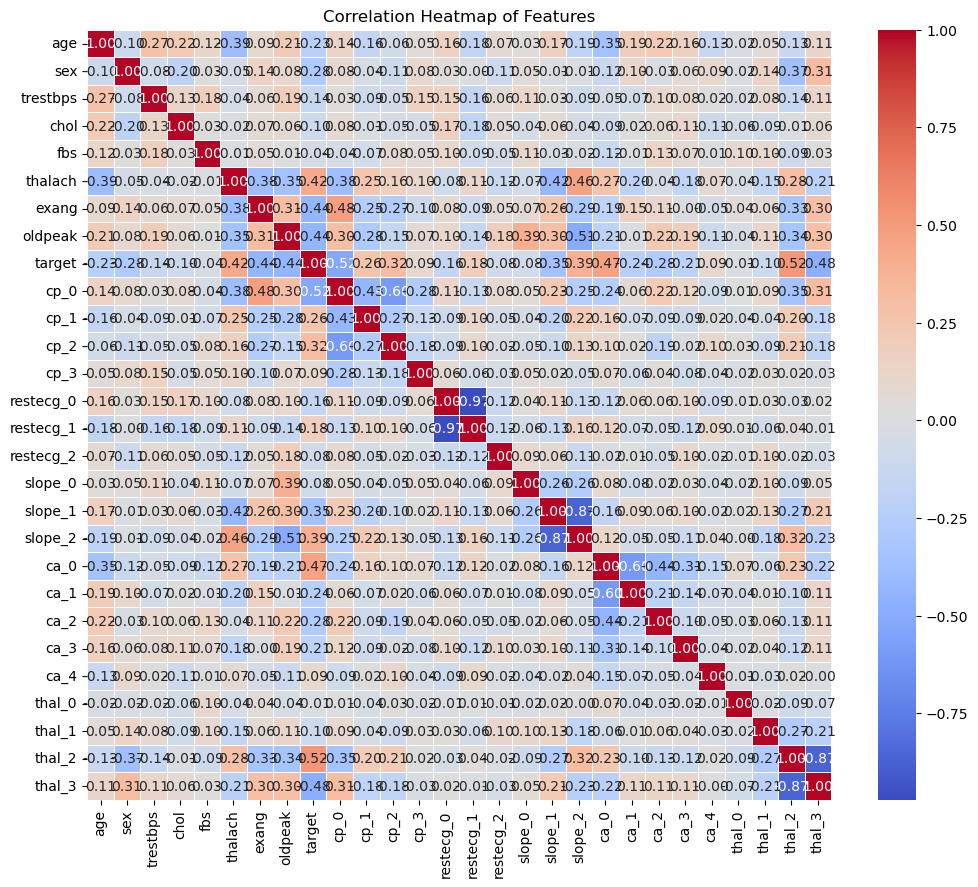

In [60]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## **Random Forest**

In [61]:
# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [62]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [64]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9853658536585366


In [65]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [66]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[102   0]
 [  3 100]]


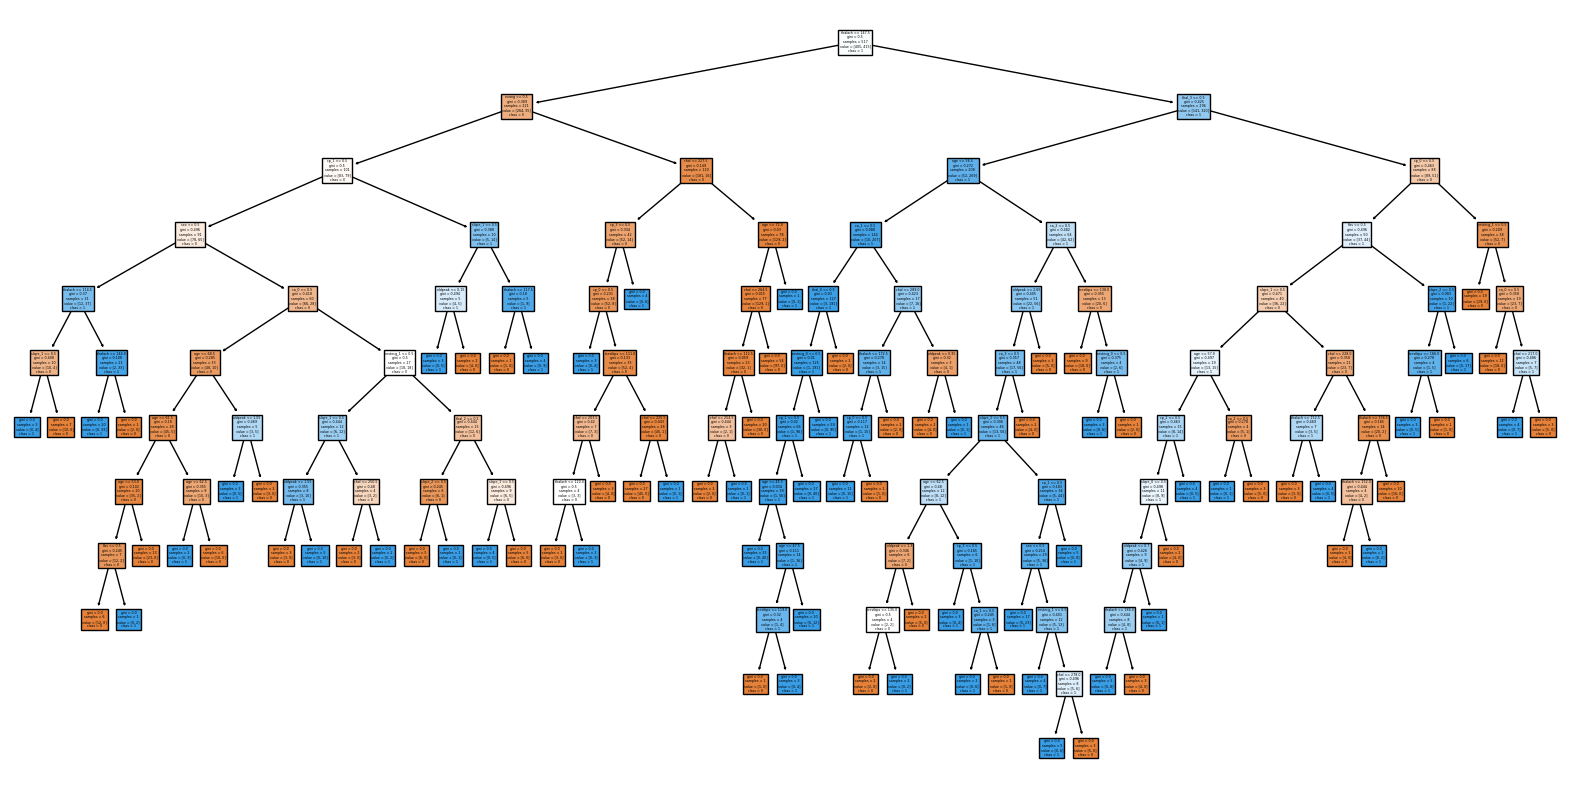

In [67]:
# Visualize a single tree from the Random Forest (optional)
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

In [68]:
# Feature importance plot
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

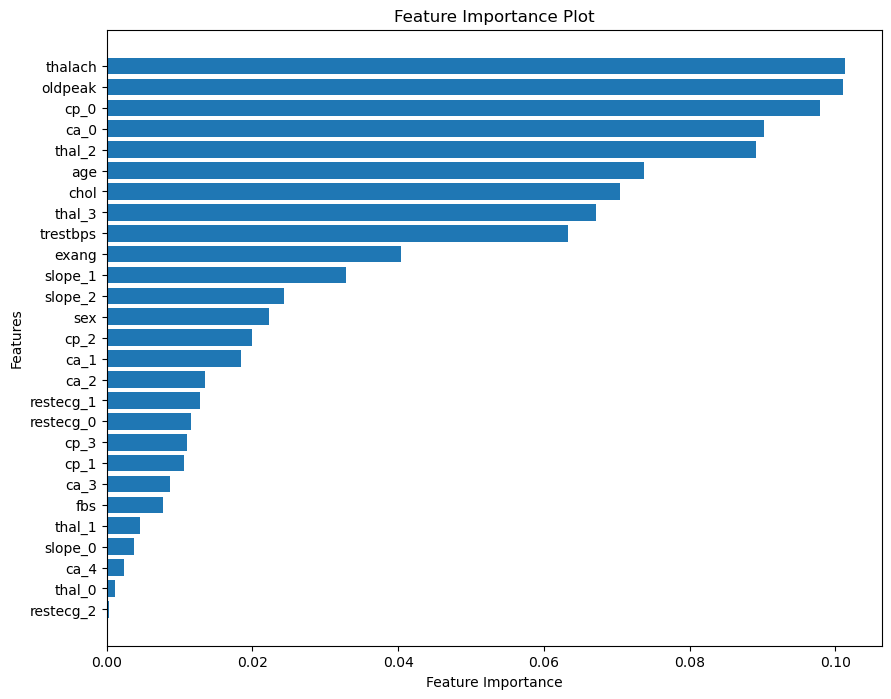

In [69]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

## **Decision Trees**

In [70]:
# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

In [71]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [73]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9853658536585366


In [74]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [75]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[102   0]
 [  3 100]]


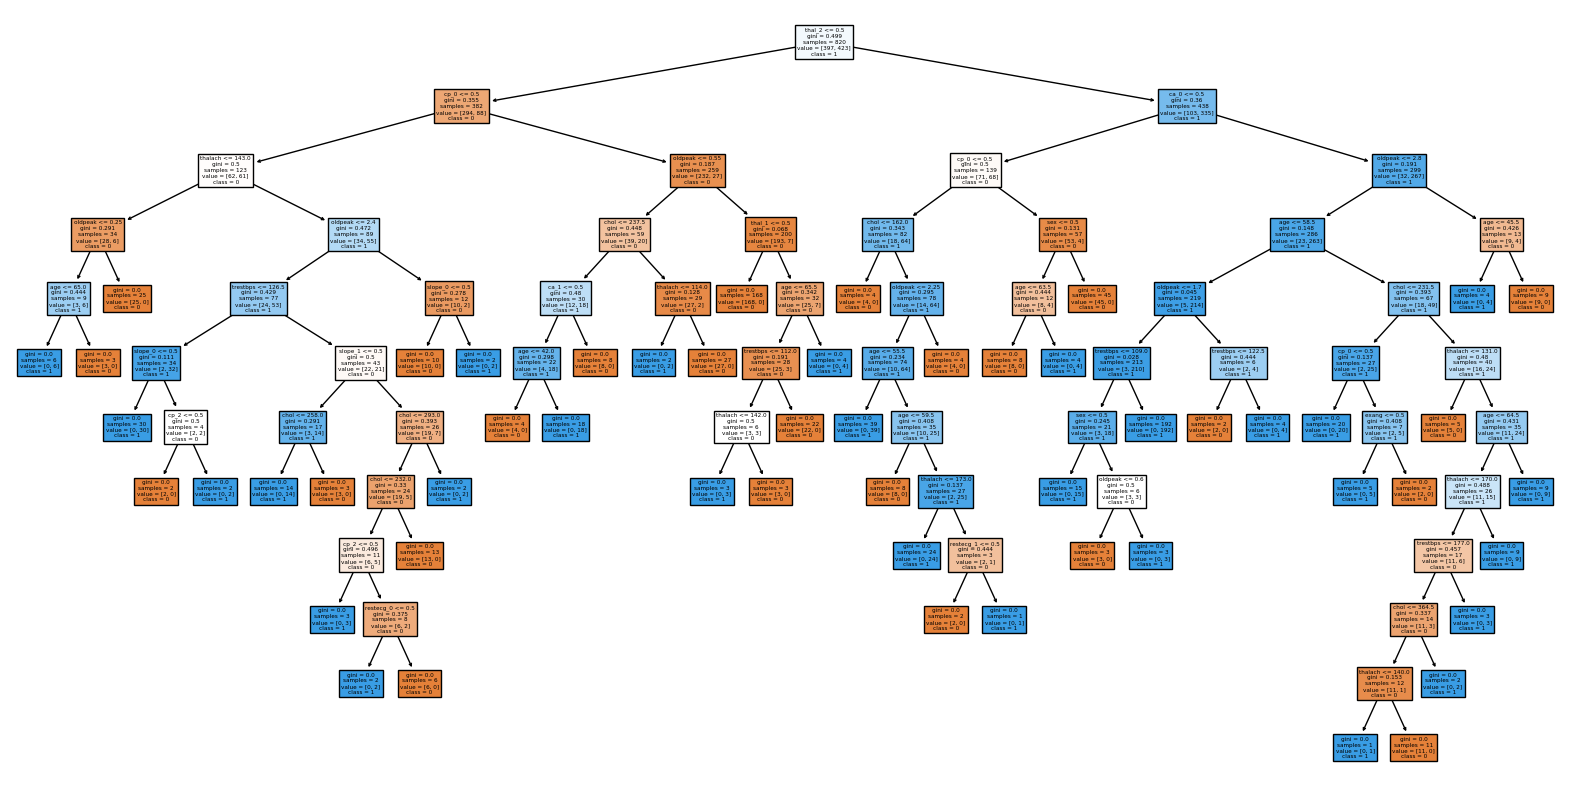

In [76]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

In [77]:
# Initialize the Support Vector Machine (SVM) classifier
model = SVC(probability=True, random_state=42)

In [78]:
# Train the model
model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [79]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [80]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6780487804878049


In [81]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6780487804878049


In [82]:
# ROC curve and AUC score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


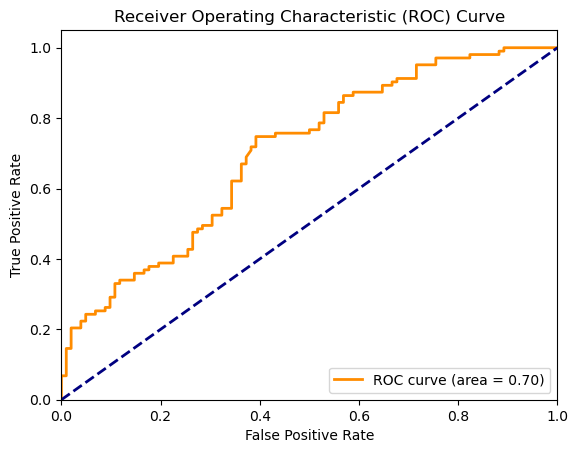

In [83]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [84]:
# R2 score (not applicable for classification, included for completeness)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: -0.2878355225585383


## **CatBoost**


In [85]:
# Initialize the CatBoost classifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=False)

In [87]:
# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

In [88]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9853658536585366


In [89]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [90]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[102   0]
 [  3 100]]


In [91]:
# ROC curve and AUC score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

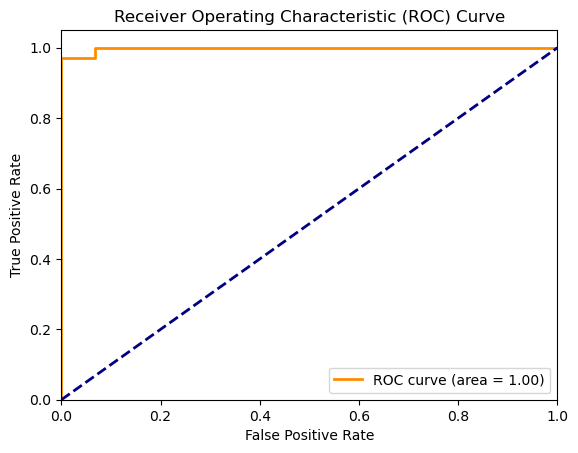

In [92]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [93]:
# Feature importance plot
feature_importance = model.get_feature_importance()
sorted_idx = np.argsort(feature_importance)

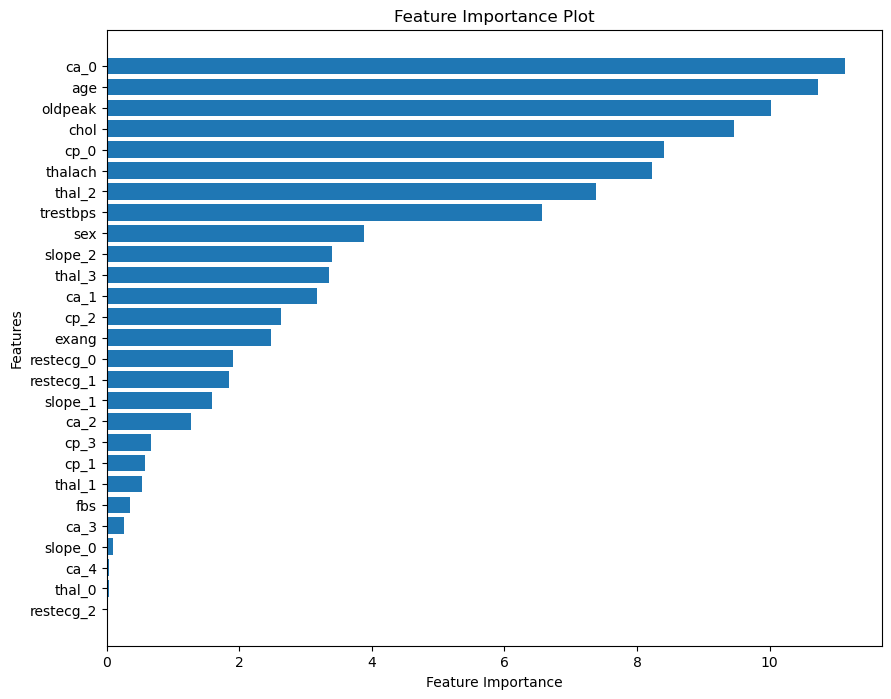

In [94]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

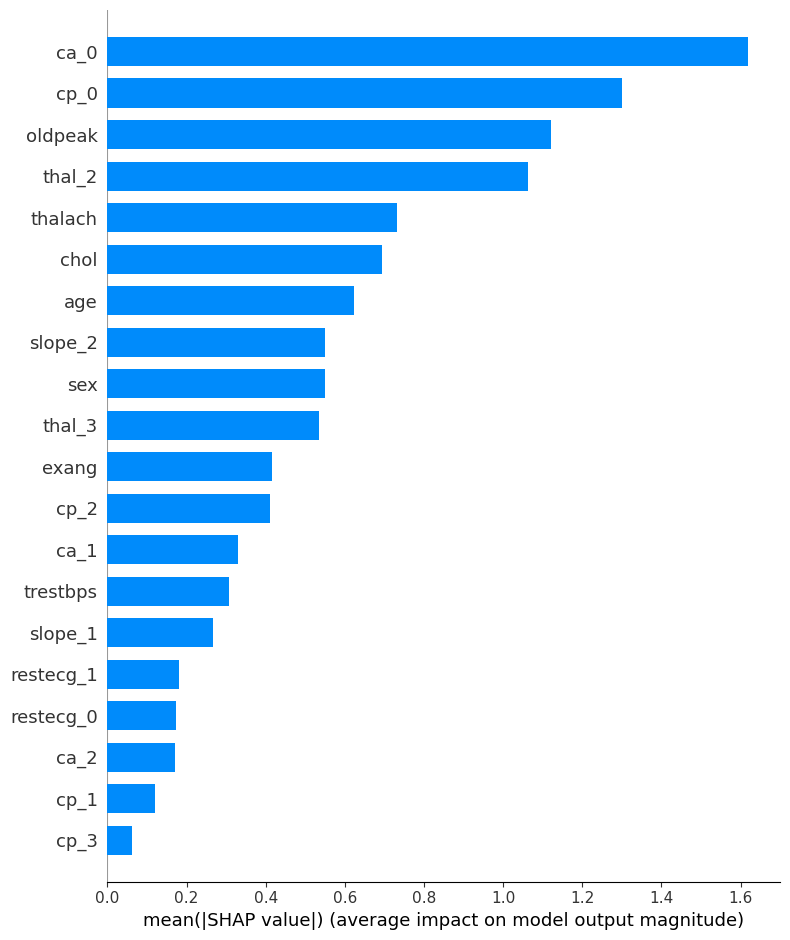

In [95]:
# SHAP (SHapley Additive exPlanations) values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [96]:
# Learning curve
model.learning_rate = 0.01  # Adjust learning rate for learning curve
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

## **Extreme Gradient Boosting (XGBoost)**

In [97]:
from xgboost import XGBClassifier


In [ ]:
#Pairplot
sns.pairplot(heart, hue='target', diag_kind='kde')
plt.show()

In [100]:
# Initialize the XGBoost classifier
model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=6, objective='binary:logistic', random_state=42)

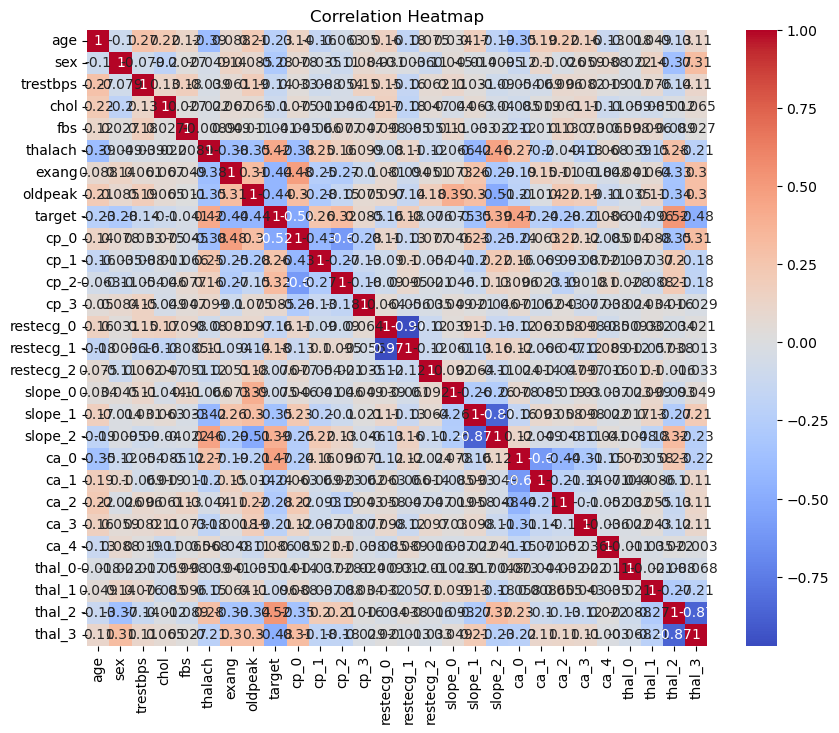

In [101]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [102]:
# Initialize the XGBoost classifier
model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=6, objective='binary:logistic', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [103]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
[[102   0]
 [  3 100]]


In [104]:
# ROC curve and AUC score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

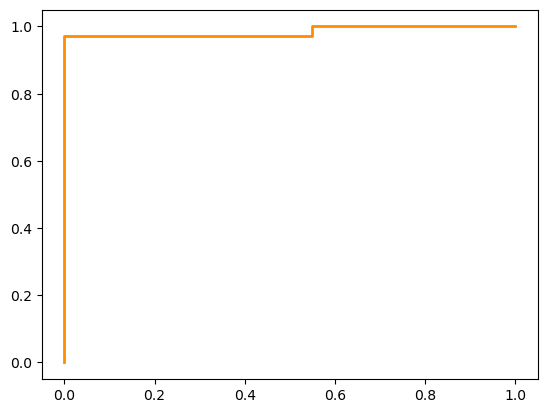

In [105]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

In [106]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.9414620217018846


##  **Ensemble methods**


In [108]:
# Initialize the ensemble classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [109]:
# List of classifiers
classifiers = [('Random Forest', random_forest),
               ('AdaBoost', ada_boost),
               ('Gradient Boosting', gradient_boosting)]

In [110]:
# Train and evaluate each classifier
for clf_name, clf in classifiers:
    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy:", accuracy)

    # Classification report
    print(f"{clf_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print(f"{clf_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

  

Random Forest Accuracy: 0.9853658536585366
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Random Forest Confusion Matrix:
[[102   0]
 [  3 100]]
AdaBoost Accuracy: 0.8878048780487805
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       102
           1       0.91      0.86      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

AdaBoost Confusion Matrix:
[[93  9]
 [14 89]]
Gradient Boosting Accuracy: 0.9414634146341463
Gradient Boosting Classification Report:
       